# Slow Boring Article Clustering (i.e., Grouping)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.io
import seaborn as sns
from IPython.display import display
from scipy.sparse import csr_matrix
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer

## Load Data
Read in data files for posts and word counts. Also perform some basic analysis of the raw data.

In [2]:
posts: pd.DataFrame = pd.read_csv('data/posts.csv')
posts['date'] = pd.to_datetime(posts['date'])
posts.head()

,post_id,date,title,comments,likes,url
0,18135875,2020-11-13 15:55:55,Welcome to Slow Boring,243,148,https://www.slowboring.com/p/welcome-to-slow-b...
1,18177334,2020-11-18 11:00:53,Joe Biden's Cabinet isn't what matters,153,67,https://www.slowboring.com/p/joe-bidens-cabine...
2,18503568,2020-11-24 11:00:18,Low interest rates are a curse — we need massi...,107,54,https://www.slowboring.com/p/low-interest-rate...
3,18586396,2020-11-16 11:00:43,Make Blue America Great Again,332,176,https://www.slowboring.com/p/make-blue-america...
4,18642680,2020-11-17 11:09:52,"Minimum wage wins, affirmative action loses",229,139,https://www.slowboring.com/p/minimum-wage-wins...


In [3]:
X: csr_matrix = scipy.io.mmread('data/word_counts.mtx').tocsr()
X

<438x14743 sparse matrix of type '<class 'numpy.int64'>'
	with 317141 stored elements in Compressed Sparse Row format>

In [4]:
# fraction of matrix elements that are non-zero
X.nnz / np.prod(X.shape)

0.04911254222652527

In [5]:
words: pd.Series = pd.read_csv('data/words.csv')['word']
words.sample(10, random_state=0xCAFE)

10405                 pulled
3191               dangerous
6520           instead think
14527              work make
4747           family policy
9309     people experiencing
14557              world bad
10969               remarked
1008          argument favor
638                  african
Name: word, dtype: object

In [6]:
word_counts = pd.DataFrame.sparse.from_spmatrix(X, posts['post_id'], words)
word_counts

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
post_id,,,,,,,,,,,,,,,,,,,,,
18135875,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18177334,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18503568,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18586396,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
18642680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54003982,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54303445,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54679617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
word_counts_sample = word_counts.sample(20, random_state=0xCAFE)
word_counts_sampled_words = word_counts_sample.sum(axis=0).sort_values(ascending=False).head(30).index
word_counts_sample = word_counts_sample[word_counts_sampled_words]
word_counts_sample

word,lead,black,states,right,politics,tax,idea,better,policy,inflation,...,covid,high,white,car,biden,congress,democrats,cars,world,issues
post_id,,,,,,,,,,,,,,,,,,,,,
52816815,0,1,0,9,10,0,2,1,6,0,...,0,0,0,0,1,0,2,0,0,1
31923778,0,7,2,2,2,0,5,1,2,0,...,0,4,0,0,0,0,0,0,0,0
38260421,0,0,3,1,2,28,4,0,3,2,...,0,3,0,0,0,3,2,0,4,0
32517388,1,3,2,4,10,0,6,5,4,0,...,2,6,1,0,0,0,2,0,5,4
39567255,0,1,17,5,3,2,1,6,5,0,...,1,2,1,0,0,0,0,0,6,1
40013889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44284522,0,0,3,2,0,4,5,5,4,3,...,0,3,2,0,0,28,5,0,0,7
47017468,1,0,4,13,2,0,4,2,3,0,...,0,0,1,0,11,0,5,0,0,0
47140290,1,0,2,1,1,0,1,1,10,0,...,0,0,0,0,10,1,3,0,2,0


<AxesSubplot:xlabel='word', ylabel='post_id'>

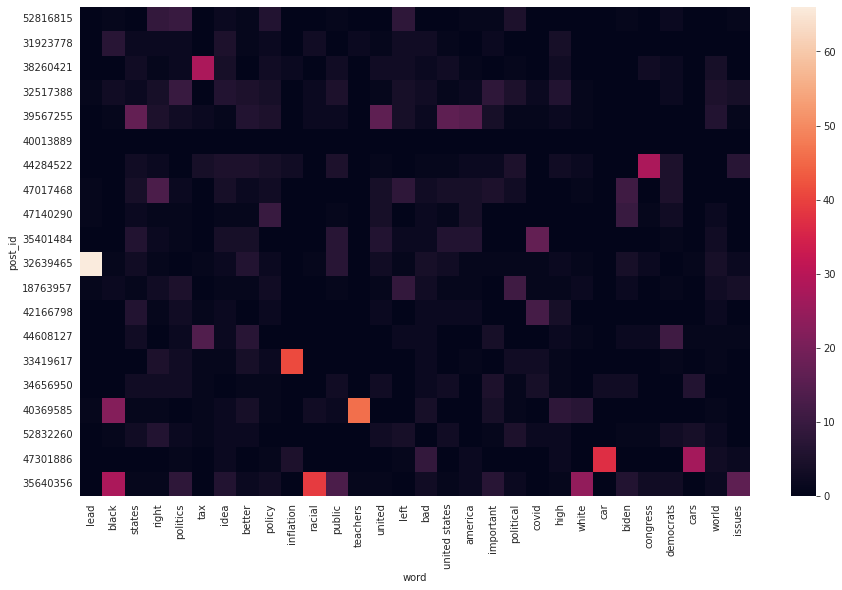

In [8]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111)
sns.heatmap(word_counts_sample, ax=ax)

In [9]:
word_sums = word_counts.sum(axis=0).rename('count').sort_values(ascending=False)
word_sums.head(10)

word
policy       1443
biden        1273
states       1268
democrats    1221
right        1196
political    1164
idea         1141
public       1135
state        1115
trump        1099
Name: count, dtype: int64

Text(0.5, 0, 'sum word count')

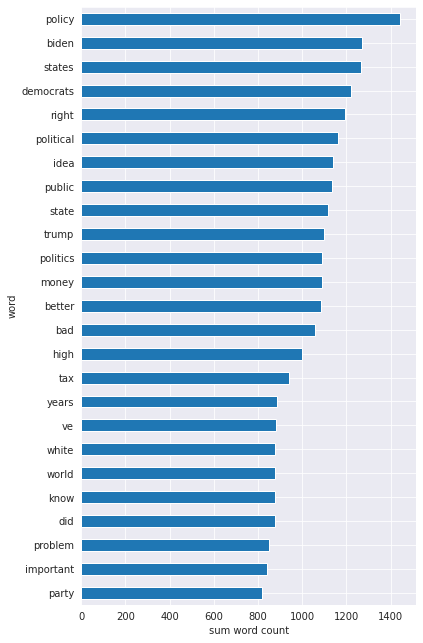

In [10]:
word_sums.head(25).iloc[::-1].plot.barh(figsize=(6, 11))
plt.xlabel('sum word count')

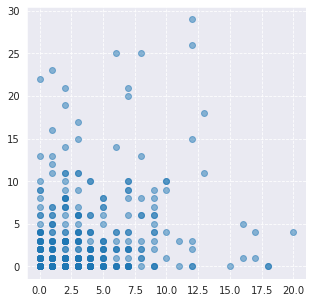

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(word_counts['policy'], word_counts['biden'], alpha=0.5)
plt.grid(True, linestyle='--')

## Tfidf transformation

In [12]:
tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X)
X_tfidf

<438x14743 sparse matrix of type '<class 'numpy.float64'>'
	with 317141 stored elements in Compressed Sparse Row format>

In [13]:
tfidf_df = pd.DataFrame.sparse.from_spmatrix(X_tfidf, posts['post_id'], words)
tfidf_df

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
post_id,,,,,,,,,,,,,,,,,,,,,
18135875,0.000000,0.0,0.0,0.0,0.0,0.020552,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18177334,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18503568,0.000000,0.0,0.0,0.0,0.0,0.031411,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18586396,0.000000,0.0,0.0,0.0,0.0,0.010513,0.0,0.0,0.000000,0.0,...,0.0,0.017368,0.0,0.0,0.026343,0.0,0.0,0.0,0.0,0.0
18642680,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54003982,0.000000,0.0,0.0,0.0,0.0,0.022543,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
54303445,0.011193,0.0,0.0,0.0,0.0,0.010134,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
54679617,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='word'>

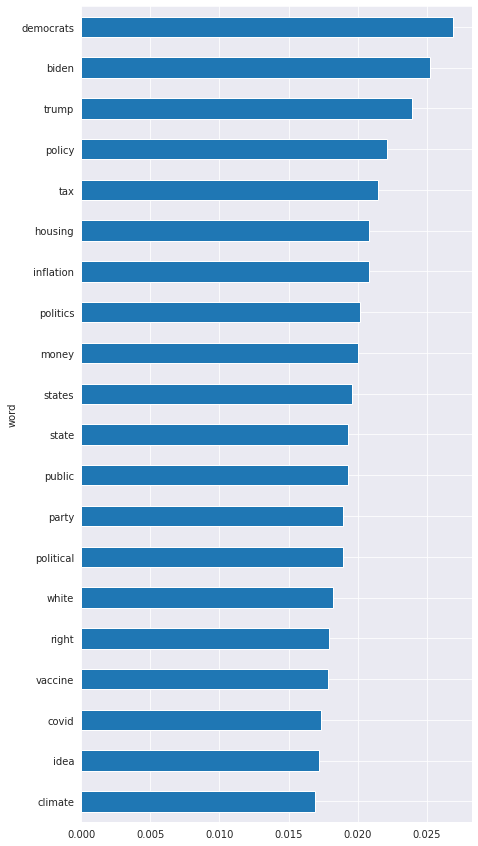

In [14]:
tfidf_df.mean(axis=0).sort_values().tail(20).plot.barh(figsize=(7, 15))

In [15]:
X_norm = Normalizer(copy=True).fit_transform(X_tfidf)
X_norm

<438x14743 sparse matrix of type '<class 'numpy.float64'>'
	with 317141 stored elements in Compressed Sparse Row format>

In [16]:
word_norm = pd.DataFrame.sparse.from_spmatrix(X_norm, posts['post_id'], words)
word_norm

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
post_id,,,,,,,,,,,,,,,,,,,,,
18135875,0.000000,0.0,0.0,0.0,0.0,0.020552,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18177334,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18503568,0.000000,0.0,0.0,0.0,0.0,0.031411,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
18586396,0.000000,0.0,0.0,0.0,0.0,0.010513,0.0,0.0,0.000000,0.0,...,0.0,0.017368,0.0,0.0,0.026343,0.0,0.0,0.0,0.0,0.0
18642680,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54003982,0.000000,0.0,0.0,0.0,0.0,0.022543,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
54303445,0.011193,0.0,0.0,0.0,0.0,0.010134,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
54679617,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


## Correlations and Dimensional Reduction


In [17]:
def sparse_corrcoef(A):
    # from https://stackoverflow.com/questions/19231268/correlation-coefficients-for-sparse-matrix-in-python

    A = A.astype(np.float64)
    n = A.shape[1]

    # Compute the covariance matrix
    rowsum = A.sum(1)
    centering = rowsum.dot(rowsum.T.conjugate()) / n
    C = (A.dot(A.T.conjugate()) - centering) / (n - 1)

    # The correlation coefficients are given by
    # C_{i,j} / sqrt(C_{i} * C_{j})
    d = np.diag(C)
    coeffs = C / np.sqrt(np.outer(d, d))

    return coeffs

corr = sparse_corrcoef(X.T)
corr = pd.DataFrame(np.array(corr), words, words)
corr

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
word,,,,,,,,,,,,,,,,,,,,,
000,1.000000,0.183741,0.231967,0.200646,0.510605,0.127281,0.208499,0.016255,0.011846,0.025885,...,-0.052265,0.016400,0.190221,-0.021144,-0.015673,0.063508,-0.045845,0.047105,-0.035463,-0.003756
000 month,0.183741,1.000000,-0.022360,-0.012407,0.095686,-0.064479,-0.022484,-0.015519,-0.018884,-0.017638,...,-0.013086,0.012106,-0.012407,-0.014351,-0.012407,-0.013662,-0.011478,-0.026006,-0.010030,-0.017638
000 people,0.231967,-0.022360,1.000000,0.049576,-0.041953,0.086630,0.083330,-0.023400,0.075457,-0.026595,...,-0.019731,-0.000558,0.049576,0.057345,-0.018708,-0.020600,-0.017307,0.168976,-0.015123,-0.026595
000 square,0.200646,-0.012407,0.049576,1.000000,0.022649,0.005791,-0.018812,-0.012984,-0.015800,-0.014757,...,-0.010948,0.088420,0.368512,0.134082,0.021194,0.107774,-0.009603,0.026374,-0.008392,-0.014757
000 year,0.510605,0.095686,-0.041953,0.022649,1.000000,0.062006,0.168085,-0.029118,-0.000479,-0.000447,...,-0.024552,-0.026318,-0.023279,-0.026926,-0.023279,-0.025633,-0.021536,-0.031291,-0.018818,0.032199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoning rules,0.063508,-0.013662,-0.020600,0.107774,-0.025633,0.046859,-0.020715,-0.014298,-0.017398,-0.016250,...,-0.012056,0.121994,0.226978,-0.013222,0.018371,1.000000,-0.010575,0.021470,-0.009240,0.068481
zoo,-0.045845,-0.011478,-0.017307,-0.009603,-0.021536,0.028032,-0.017404,-0.012012,-0.014617,-0.013652,...,0.679979,0.006688,-0.009603,-0.011108,-0.009603,-0.010575,1.000000,0.098616,-0.007763,-0.013652
zoom,0.047105,-0.026006,0.168976,0.026374,-0.031291,-0.001871,-0.039432,-0.027217,0.076774,-0.030933,...,0.098890,0.075933,0.026374,0.141859,0.098574,0.021470,0.098616,1.000000,-0.017590,-0.030933


In [18]:
(pd.Series(corr.values.ravel())
 .describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])
 .drop(['count'])
 .mul(100)
 .round(1))

mean       0.4
std        5.3
min      -20.0
1%        -5.4
5%        -3.7
10%       -3.0
25%       -2.1
50%       -1.4
75%        0.6
90%        6.9
95%       11.2
99%       21.2
99.9%     39.3
max      100.0
dtype: float64

<Figure size 1080x504 with 0 Axes>

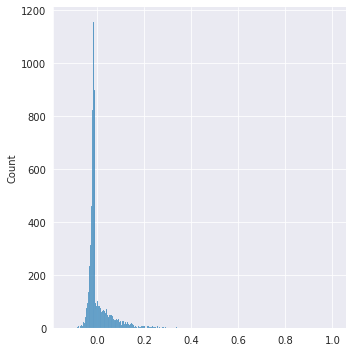

In [19]:
plt.figure(figsize=(15, 7))
sns.displot(pd.Series(corr.values.ravel()).sample(10_000, random_state=0xCAFE))

In [20]:
i,j = np.where((corr.values > 0.97) & (corr.values < 0.999))
w = i > j
high_corrs = pd.concat([pd.Series(i[w], name='i'), pd.Series(j[w], name='j')], axis=1)
for axis in 'i', 'j':
    high_corrs['w_' + axis] = pd.Series(word_counts.columns).iloc[high_corrs[axis]].reset_index(drop=True)
    high_corrs['n_' + axis] = word_sums.loc[high_corrs['w_' + axis]].reset_index(drop=True)
high_corrs['corr'] = high_corrs.apply(lambda row: corr.iloc[row['i'],row['j']], axis=1)
high_corrs = high_corrs.set_index(['w_i', 'w_j'])
high_corrs = high_corrs.drop(['i', 'j'], axis=1)
high_corrs = high_corrs.sort_values('corr', ascending=False)
high_corrs.head(20)

,,n_i,n_j,corr
w_i,w_j,,,
white supremacy,supremacy,32,33,0.998053
barack obama,barack,97,98,0.996233
year olds,olds,35,36,0.995387
supreme court,supreme,77,79,0.995359
affirmative action,affirmative,57,62,0.994876
debt ceiling,ceiling,31,37,0.992975
care act,affordable care,53,52,0.991999
1619 project,1619,11,14,0.991632
covid 19,19,302,326,0.991165


In [21]:
n_var = []
for n in [5, 10, 25, 50, 100, 250, 1000]:
    print(n)
    svd = TruncatedSVD(n)
    svd.fit(X_norm)
    n_var.append([n, svd.explained_variance_ratio_.sum()])
n_var = pd.DataFrame(n_var, columns=['n', 'var'])
n_var

5
10
25
50
100
250
1000


,n,var
0,5,0.067448
1,10,0.119468
2,25,0.210799
3,50,0.312493
4,100,0.459463
5,250,0.769080
6,1000,1.000000


In [22]:
svd = TruncatedSVD(20)
X_lsa = svd.fit_transform(X_norm)
X_lsa

array([[ 0.40043109,  0.29659837,  0.02005363, ...,  0.07553624,
        -0.02475832,  0.08210373],
       [ 0.29636141,  0.09609708, -0.02084771, ..., -0.05256979,
         0.00281181,  0.03130285],
       [ 0.37716434, -0.0540061 , -0.17183731, ...,  0.01693771,
        -0.06829274, -0.03573648],
       ...,
       [ 0.26918331, -0.20584097, -0.13847034, ...,  0.02341988,
         0.0477609 , -0.04907017],
       [ 0.13944451, -0.05817875,  0.03080684, ..., -0.01644113,
        -0.00484561, -0.03830634],
       [ 0.34931586, -0.13968697,  0.26993328, ...,  0.00233013,
         0.09087267, -0.00219559]])

In [23]:
svd.explained_variance_ratio_.sum()

0.18439756304033056

In [24]:
svd_components = pd.DataFrame(svd.components_, columns=words)
svd_components

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
0,0.031464,0.001883,0.003114,0.000988,0.006758,0.022225,0.003862,0.001496,0.002384,0.002606,...,0.001448,0.018131,0.001139,0.001633,0.005384,0.001736,0.001835,0.006031,0.001775,0.002399
1,-0.019549,-0.002360,-0.002326,-0.002181,0.002826,-0.013124,-0.001368,-0.003692,-0.002589,-0.002167,...,-0.001652,-0.013285,-0.001044,-0.000162,-0.001513,-0.001972,-0.000909,-0.011342,-0.002324,-0.002145
2,-0.012687,-0.001356,0.004748,-0.001109,-0.008145,0.001266,-0.001999,-0.001193,0.003309,0.005824,...,0.001141,-0.008223,-0.000463,-0.000724,-0.003131,-0.001129,0.001877,0.009404,0.006207,-0.002546
3,-0.012042,0.000406,0.001062,0.005539,-0.006817,-0.003382,-0.001619,-0.003165,-0.002725,-0.004656,...,0.007190,0.065117,0.005442,0.004676,0.019683,0.003366,0.005174,0.003020,-0.000799,0.001164
4,-0.038431,-0.003792,0.000259,-0.002495,-0.014174,-0.000764,-0.002295,0.002973,-0.001612,-0.000736,...,-0.002611,-0.031294,-0.003380,-0.001636,-0.009544,-0.000511,-0.001793,-0.003030,0.003761,-0.002644
5,-0.022123,-0.001405,-0.002207,-0.001384,-0.008538,-0.002398,-0.001562,0.003327,-0.005386,-0.001598,...,-0.000463,0.017400,0.001670,0.000321,0.005556,-0.000035,0.001278,0.000424,-0.001632,0.001352
6,0.006950,0.000306,-0.003266,-0.004895,0.005725,0.001289,0.003420,-0.000396,-0.002023,0.000447,...,-0.005462,-0.037237,-0.002737,-0.002625,-0.013049,-0.001212,-0.005703,-0.006103,0.000358,0.003002
7,-0.017479,-0.001717,-0.000977,-0.003331,-0.004732,0.002812,-0.001432,-0.000126,-0.000795,0.000634,...,-0.003452,-0.020553,-0.001279,-0.001186,-0.008739,0.001117,-0.003581,-0.007014,0.002418,-0.000334
8,0.005106,0.001313,0.001913,-0.000171,0.000814,0.006136,-0.001869,-0.000248,0.002085,-0.001168,...,0.004194,-0.021437,-0.000089,-0.001924,-0.009213,0.001034,0.006097,-0.004676,-0.001269,-0.003034
9,-0.002496,0.002647,-0.001902,-0.001821,-0.000211,0.004597,0.005341,-0.001516,-0.001535,-0.002633,...,0.010391,-0.067974,-0.007197,-0.004408,-0.022326,-0.004204,0.006251,0.004268,0.001496,0.001244


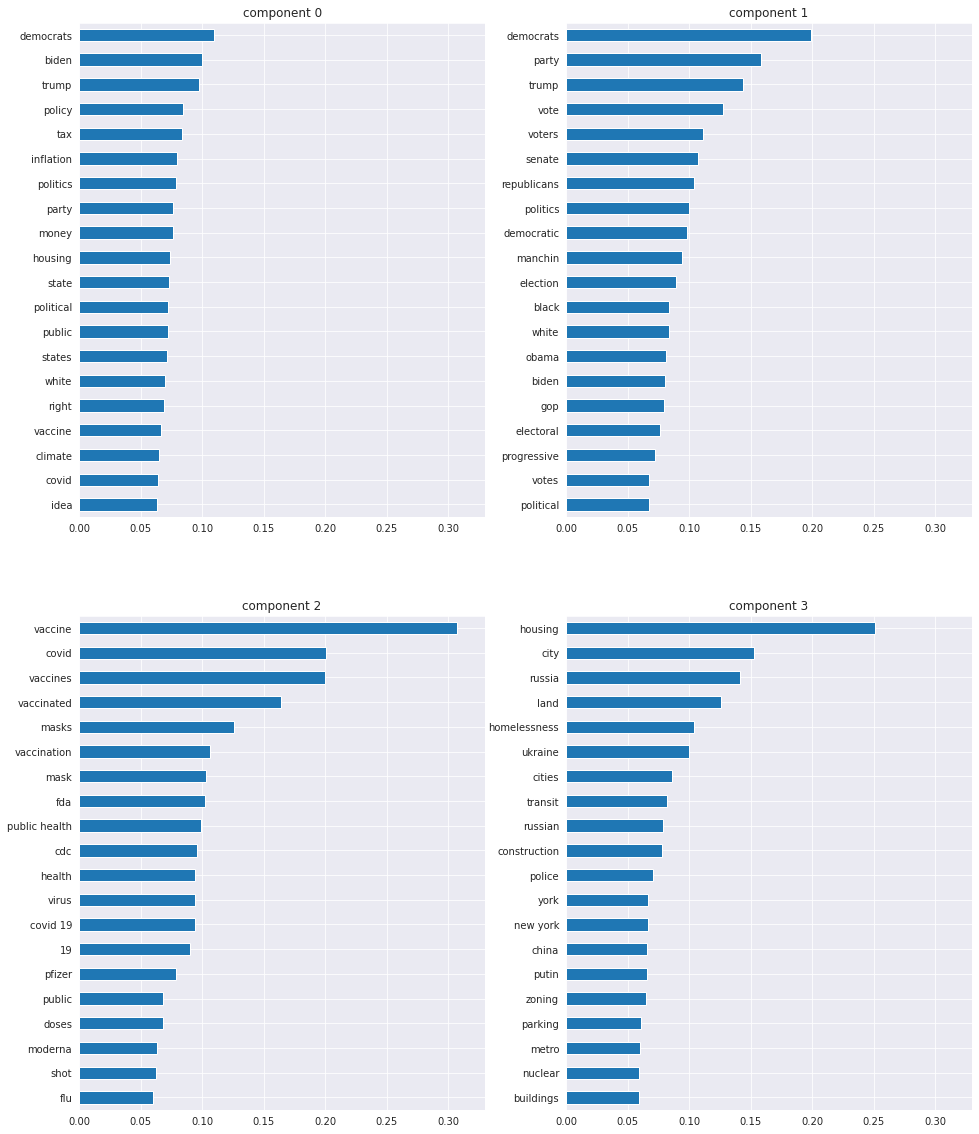

In [25]:
fig = plt.figure(figsize=(16, 20))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title(f'component {i}')
    (svd_components.iloc[i]
     .sort_values()
     .tail(20)
     .plot.barh(ax=ax)
    )
    ax.set_xlim(0, 0.33)
    ax.set_ylabel(None)

## Clustering

In [26]:
km = MiniBatchKMeans(
    n_clusters=10,
    init="k-means++",
    n_init=1,
    init_size=1000,
    batch_size=1000,
    verbose=10,
)
km.fit(X_lsa)
None

Init 1/1 with method k-means++
Inertia for init 1/1: 60.75374667448343
Minibatch step 1/100: mean batch inertia: 0.13813746133940974
Minibatch step 2/100: mean batch inertia: 0.10150248842466811, ewa inertia: 0.10150248842466811
Minibatch step 3/100: mean batch inertia: 0.0946993245445553, ewa inertia: 0.0946993245445553
Minibatch step 4/100: mean batch inertia: 0.09615514567370542, ewa inertia: 0.09615514567370542
Minibatch step 5/100: mean batch inertia: 0.09748005266042815, ewa inertia: 0.09748005266042815
Minibatch step 6/100: mean batch inertia: 0.10280880695868859, ewa inertia: 0.10280880695868859
Minibatch step 7/100: mean batch inertia: 0.0990751176046125, ewa inertia: 0.0990751176046125
Minibatch step 8/100: mean batch inertia: 0.09074836405977288, ewa inertia: 0.09074836405977288
Minibatch step 9/100: mean batch inertia: 0.10062658018488237, ewa inertia: 0.10062658018488237
Minibatch step 10/100: mean batch inertia: 0.09493693607912, ewa inertia: 0.09493693607912
Minibatch st

In [27]:
original_space_centroids = pd.DataFrame(svd.inverse_transform(km.cluster_centers_), columns=words)
original_space_centroids

word,000,000 month,000 people,000 square,000 year,10,10 000,10 15,10 billion,10 million,...,zones,zoning,zoning codes,zoning laws,zoning reform,zoning rules,zoo,zoom,zoonotic,zuckerberg
0,0.009851,0.000524,-0.000198,-0.000290,0.002513,0.006610,0.002647,0.000045,-0.000366,0.000499,...,0.000143,0.001861,0.000013,0.000084,0.000495,-0.000174,-0.000088,0.002131,0.000042,0.000943
1,0.016894,0.001288,0.000431,0.000123,0.004488,0.008474,0.001814,0.001347,0.000764,0.000627,...,-0.000315,0.000600,-0.000026,0.000046,-0.000266,0.000528,-0.000161,0.001514,-0.000333,0.001484
2,0.010162,0.000175,0.002755,-0.000081,0.000080,0.008642,0.000513,0.001153,0.002993,0.003758,...,0.000140,-0.000907,-0.000106,-0.000107,-0.000597,-0.000095,0.000431,0.005351,0.002095,-0.000148
3,0.005489,0.000199,0.000913,-0.000288,0.000829,0.006486,0.000068,0.000010,0.000398,0.000557,...,0.000637,0.009106,0.001299,0.000538,0.002058,0.001120,0.001326,-0.000766,-0.000066,0.000604
4,0.001759,-0.000066,0.001348,0.000133,-0.000448,0.005768,0.000170,-0.000002,0.000353,0.000369,...,-0.000439,0.003186,-0.000023,0.000577,0.000615,0.001113,-0.000718,-0.000042,0.001094,-0.000196
5,0.006058,0.000515,0.000736,0.000270,0.000927,0.005365,0.001087,0.000196,0.000611,0.000663,...,0.000499,0.004677,0.000207,0.000511,0.001272,0.000518,0.000620,0.002299,0.001360,0.001100
6,0.004927,-0.000126,0.000393,-0.000091,0.002247,0.004180,0.000838,0.000059,0.000138,0.000156,...,-0.000038,0.002469,0.000021,0.000467,0.001598,0.000038,0.000578,-0.000101,-0.000619,-0.000084
7,0.007188,0.000319,0.001219,-0.000112,0.000817,0.005697,0.001393,0.000082,0.000307,0.000165,...,-0.000303,-0.000516,-0.000092,0.000077,-0.000522,0.000518,-0.000306,0.000061,0.000958,-0.000024
8,0.008290,0.001325,0.001422,0.002032,0.001480,0.006495,0.000724,0.000171,0.001595,0.000264,...,0.007853,0.003380,-0.000092,0.000020,0.000768,-0.000519,0.004496,0.001987,-0.000320,-0.000181
9,0.011986,0.000940,0.001749,0.003162,0.000330,0.005123,0.000248,0.000309,0.000314,-0.000235,...,0.001266,0.043572,0.003646,0.002876,0.014015,0.002502,0.001693,0.004376,-0.000037,0.000442


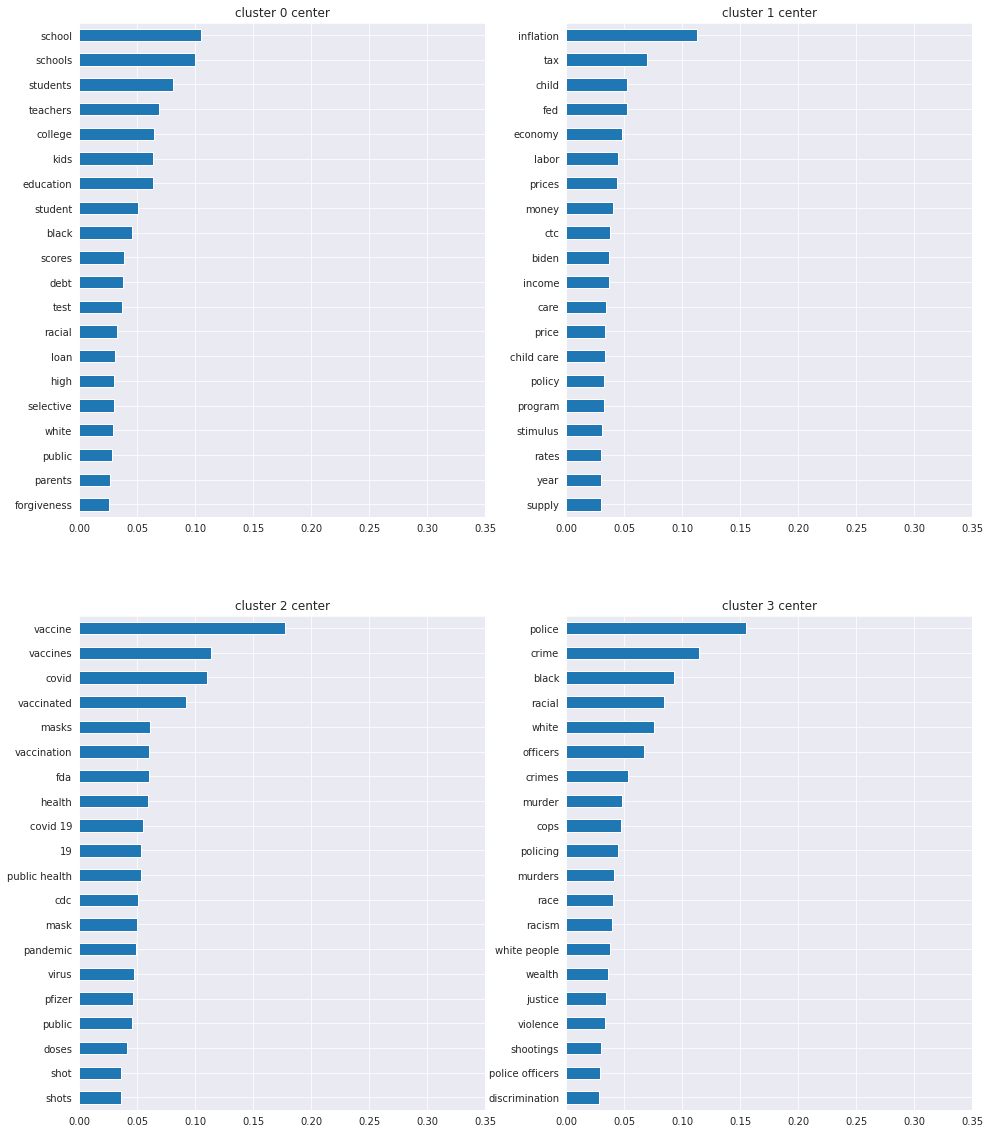

In [28]:
fig = plt.figure(figsize=(16, 20))
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.set_title(f'cluster {i} center')
    (original_space_centroids.iloc[i]
     .sort_values()
     .tail(20)
     .plot.barh(ax=ax)
    )
    ax.set_xlim(0, 0.35)
    ax.set_ylabel(None)

In [29]:
cluster_labels = pd.Series(km.labels_, index=posts['post_id'], name='cluster')
cluster_labels.sample(10, random_state=0xCAFE)

post_id
52816815    6
31923778    0
38260421    4
32517388    5
39567255    5
40013889    5
44284522    6
47017468    6
47140290    7
35401484    2
Name: cluster, dtype: int32

In [30]:
cluster_counts = cluster_labels.value_counts().rename('count')
cluster_counts

5    132
6     71
1     68
2     35
9     28
3     26
0     24
4     20
8     17
7     17
Name: count, dtype: int64

In [31]:
clustered_posts = pd.merge(
    cluster_labels.to_frame(),
    posts.set_index('post_id'),
    left_index=True,
    right_index=True
)
clustered_posts.sample(10, random_state=0xCAFE)

,cluster,date,title,comments,likes,url
post_id,,,,,,
52816815,6,2022-04-28 10:00:33,Some boring takes on the French election,115,118,https://www.slowboring.com/p/some-boring-takes...
31923778,0,2021-01-28 11:00:41,"The ""cancel culture"" debate is dumb",517,369,https://www.slowboring.com/p/cancel-culture
38260421,4,2021-07-06 10:01:14,Popularism for moderates: The case of the carb...,131,103,https://www.slowboring.com/p/carbon-tax
32517388,5,2021-02-14 04:17:17,In defense of interesting writing on controver...,474,288,https://www.slowboring.com/p/slate-star-codex
39567255,5,2021-08-06 10:00:39,Hungarian nationalism is not the answer,432,208,https://www.slowboring.com/p/hungarian-nationa...
40013889,5,2021-08-14 14:12:27,Saturday Thread,94,4,https://www.slowboring.com/p/saturday-thread-e2d
44284522,6,2021-11-29 11:00:30,America should invest in its federal legislature,257,133,https://www.slowboring.com/p/congressional-pay
47017468,6,2022-01-14 11:00:47,The bad vibes of American political institutions,214,121,https://www.slowboring.com/p/the-bad-vibes-of-...
47140290,7,2022-01-15 11:00:39,The case for rapprochement with Russia,161,71,https://www.slowboring.com/p/the-case-for-rapp...


In [32]:
for cluster, n in cluster_counts.items():
    print(f'{cluster=} {n=}')
    key_terms = (
        original_space_centroids
        .iloc[cluster]
        .sort_values(ascending=False)
        .head(10)
        .mul(1000)
        .round()
        .astype(int)
    )
    display(key_terms.to_frame().T)

    cluster_sample = (
        clustered_posts
        [clustered_posts['cluster'] == cluster]
        .sample(min(5, n), random_state=0xCAFE)
        .sort_values('date')
        .assign(date=lambda x: x['date'].dt.date)
        .drop(['cluster', 'url'], axis=1)
    )
    display(cluster_sample)

cluster=5 n=132


word,amazon,trump,china,king,media,political,right,politics,public,health
5,27,23,22,20,19,19,19,19,18,18


,date,title,comments,likes
post_id,,,,
33527887,2021-03-12,Wealth isn't what matters,164,149
42771495,2021-10-29,Slow Boring’s second year starts soon,220,212
49957000,2022-03-11,New York State of mailbag,158,89
51621477,2022-04-12,The case for Terminator analogies,259,137
52491210,2022-04-22,A very messy mailbag,310,90


cluster=6 n=71


word,democrats,party,trump,biden,manchin,vote,senate,republicans,politics,democratic
6,94,72,69,59,55,55,53,50,47,45


,date,title,comments,likes
post_id,,,,
31175374,2021-01-11,The system doesn't work,298,219
39132207,2021-07-28,Kamala Harris should try to be really popular,492,223
41717672,2021-10-11,Why state legislatures don't work (and how to ...,98,86
42994582,2021-10-26,Congressional moderates could make a party of ...,169,120
51403483,2022-04-05,What was the popularism debate?,236,139


cluster=1 n=68


word,inflation,tax,child,fed,economy,labor,prices,money,ctc,biden
1,113,70,52,52,49,45,44,40,38,37


,date,title,comments,likes
post_id,,,,
32225523,2021-02-06,"Biden's anti-mobilization and big stimulus, Ro...",218,98
43680098,2021-11-10,Paid parental leave should be universal — and ...,154,103
44608127,2021-12-02,A better way to build back better,154,100
45523273,2021-12-17,"The case against ""creating jobs""",182,103
51320519,2022-04-14,The American Rescue Plan was too big,129,70


cluster=2 n=35


word,vaccine,vaccines,covid,vaccinated,masks,vaccination,fda,health,covid 19,19
2,177,114,110,92,61,60,60,59,55,53


,date,title,comments,likes
post_id,,,,
18980244,2020-11-20,Some optimism about America's Covid response,143,77
31559767,2021-01-20,The case for vaccine challenge trials,256,94
32760649,2021-02-23,"""Back to normal"" isn't a thing",256,132
33205193,2021-03-05,Covid: Year One,247,153
47817166,2022-01-31,What we talk about when we talk about a return...,670,164


cluster=9 n=28


word,housing,homelessness,land,city,construction,houses,units,zoning,homes,market
9,207,85,75,74,51,48,44,44,43,41


,date,title,comments,likes
post_id,,,,
18586396,2020-11-16,Make Blue America Great Again,332,176
31867708,2021-01-27,The “induced demand“ case against YIMBYism is ...,265,166
37135025,2021-06-07,The case for parking reform,203,111
40013897,2021-08-18,Why more Porsches means cheaper Priuses,310,153
43078271,2021-10-27,The politics of abundance,265,134


cluster=3 n=26


word,police,crime,black,racial,white,officers,crimes,murder,cops,policing
3,155,114,93,85,76,67,53,48,47,45


,date,title,comments,likes
post_id,,,,
18642680,2020-11-17,"Minimum wage wins, affirmative action loses",229,139
24243372,2020-12-11,The real history of race and the New Deal,91,70
34878921,2021-04-12,More incarceration is not the answer,338,141
38348118,2021-07-07,The known unknowns of our hot button debates,232,142
43195629,2021-11-01,Val Demings wants to catch more murderers,298,127


cluster=0 n=24


word,school,schools,students,teachers,college,kids,education,student,black,scores
0,105,100,81,69,64,64,64,51,45,39


,date,title,comments,likes
post_id,,,,
21496045,2020-12-04,The case for canceling a lot of student debt,319,63
29866749,2020-12-31,Culturally relevant pedagogy is good,344,201
36559376,2021-05-21,The anti-SAT push is misguided,334,237
43694106,2021-11-08,"""Critical Race Theory"" and actual education po...",608,278
45699207,2021-12-22,Don't close schools,319,137


cluster=4 n=20


word,climate,carbon,energy,climate change,electricity,nuclear,gas,change,emissions,fossil
4,212,110,93,88,82,80,75,61,60,59


,date,title,comments,likes
post_id,,,,
20181001,2020-12-01,Climate change is really hard,282,132
32732742,2021-04-10,It's time to get real about climate change and...,77,56
40717676,2021-09-03,Full employment is the most important thing th...,168,101
47077335,2022-01-18,Can America get to yes on a new reactor design?,237,153
48318249,2022-02-10,People need to hear the good news about climat...,328,207


cluster=8 n=17


word,amtrak,transit,rail,trains,bus,station,transportation,train,city,money
8,131,124,104,86,77,76,67,59,59,52


,date,title,comments,likes
post_id,,,,
25631028,2020-12-16,17 theses on Pete Buttigieg and the Department...,247,161
26052510,2020-12-20,Fancy stations make quality mass transit harder,151,176
34795251,2021-04-07,"America's ""crumbling"" roads and bridges are fine",217,97
40304298,2021-08-24,Amtrak's plans for a cash infusion aren't good...,191,120
42254178,2021-10-08,The BIF is a pretty BFD,128,111


cluster=7 n=17


word,russia,ukraine,russian,putin,china,afghanistan,military,ukrainian,war,nato
7,219,155,113,94,85,83,81,78,75,65


,date,title,comments,likes
post_id,,,,
35242118,2021-04-19,Leaving the ESPN Zone of Empires,308,154
38911753,2021-07-22,"What does the ""new Cold War"" with China even m...",209,95
47140290,2022-01-15,The case for rapprochement with Russia,161,71
49495257,2022-03-02,Europe needs to take primary responsibility fo...,188,104
51122253,2022-03-30,Ukraine and the end of history,155,132
